In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
print(len(words))

32033


In [4]:
print(min(len(word) for word in words))

2


In [5]:
print(max(len(word) for word in words))

15


#### Bigram Models

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [9]:
N = torch.zeros((27,
                27), dtype = torch.int32)

In [10]:
chars = sorted(set(''.join(words)))
stoi = {s:i+1 for i,s in enumerate(chars)}

In [11]:
stoi['.'] = 0

In [12]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [13]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2= stoi[ch2]
        N[ix1, ix2] += 1

In [14]:
itos = {i:s for s,i in stoi.items()}

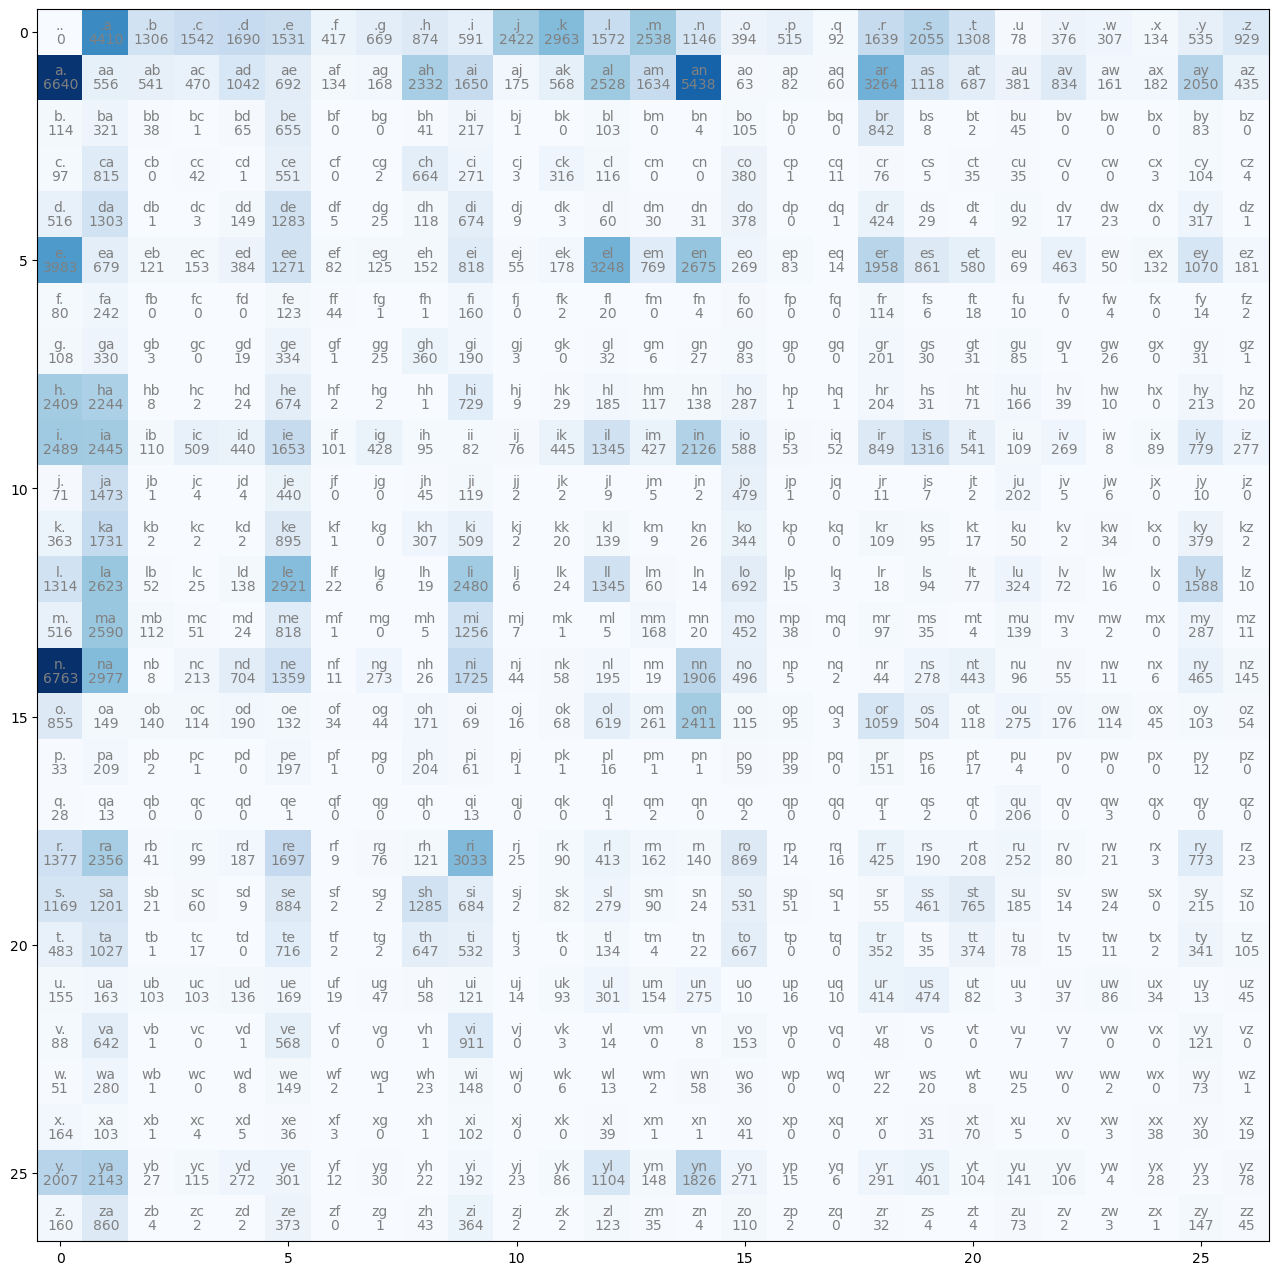

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (16, 16))
plt.imshow(N, cmap ='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va = "bottom", color = "gray")
        plt.text(j, i, N[i,j].item(), ha = "center", va = "top", color = "gray")

In [16]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
p = N[0].float()
p = p / p.sum()

In [18]:
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [19]:
p.sum()

tensor(1.)

In [20]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples = 1, 
                  replacement = True).item()
itos[ix]

'a'

In [21]:
p.shape

torch.Size([27])

In [22]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [23]:
P[0].sum()

tensor(1.)

In [24]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, 
                      replacement = True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

d.
krih.
anste.
n.
anar.


In [25]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2= stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a: 0.1376 -1.983508
an: 0.1604 -1.830174
nd: 0.0384 -3.259405
dr: 0.0770 -2.564587
re: 0.1334 -2.014275
ej: 0.0027 -5.900386
jq: 0.0003 -7.981733
q.: 0.0970 -2.333148
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [26]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
import torch.nn.functional as F

In [30]:
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
xenc.shape

torch.Size([5, 27])

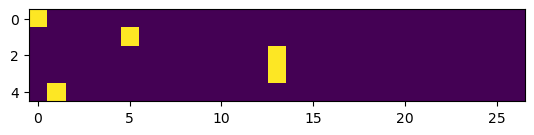

In [32]:
plt.imshow(xenc)


In [33]:
xenc.dtype

torch.float32

In [34]:
xenc.shape

torch.Size([5, 27])

In [51]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g)

In [61]:
print("Xenc shape: ", xenc.shape)
print("W shape: ", W.shape)
# forward pass
logits = (xenc @ W) # log-counts
counts = logits.exp() # N matrix
print("Counts shape ", counts.shape)
probs = counts / counts.sum(1, keepdims = True)
probs
print("Probs shape: ", probs.shape)

Xenc shape:  torch.Size([5, 27])
W shape:  torch.Size([27, 27])
Counts shape  torch.Size([5, 27])
Probs shape:  torch.Size([5, 27])


In [54]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("--------")
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} indexes ({x},{y}) ")
    print("input to neural net: ", x)
    print("output probabilities from the neural net: ", probs[i])
    print("label (actual next character): ", y)
    p = probs[i, y]
    print("probability assigned by the neural net to the correct character: ", p.item())
    logp = torch.log(p)
    print('log liklihood: ', logp.item())
    nll = - logp
    nlls[i] = nll
    print('negative log liklihood: ', nll.item())
print('=========================================')
print("average negative log liklihood: ", nlls.mean().item())

--------
bigram example 1: .e indexes (0,5) 
input to neural net:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character):  5
probability assigned by the neural net to the correct character:  0.01228625513613224
log liklihood:  -4.399273872375488
negative log liklihood:  4.399273872375488
--------
bigram example 2: em indexes (5,13) 
input to neural net:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character):  13
probability assigned by the neural net to the correct charac

In [79]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

In [99]:
# forward pass
logits = (xenc @ W) # log-counts
counts = logits.exp() # N matrix
probs = counts / counts.sum(1, keepdims = True)
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7092, grad_fn=<NegBackward0>)

In [100]:
print("Loss ", loss.item())

Loss  3.7091541290283203


In [101]:
#backward pass
W.grad = None # set zero
loss.backward()

In [102]:
W.data += -0.1 * W.grad

### Finally Put it all together

In [113]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples: ", num)

number of examples:  228146


In [114]:
for k in range(100):
    # forward pass 
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = (xenc @ W) # log-counts
    counts = logits.exp() # N matrix
    probs = counts / counts.sum(1, keepdims = True)
    # regularization w~0 -> uniform probabiltiues. And hence incentivisinng that to the loss, will make the probalities a lot smoother
    # 0.01 * (W**2).mean()
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())
    #backward pass
    W.grad = None # set zero
    loss.backward()
    
    #update
    W.data += -50 * W.grad

2.5603201389312744
2.5553669929504395
2.550808906555176
2.5466012954711914
2.5427041053771973
2.539085626602173
2.535717248916626
2.5325746536254883
2.5296366214752197
2.526885747909546
2.524305820465088
2.5218818187713623
2.519602060317993
2.5174548625946045
2.515429735183716
2.5135178565979004
2.5117106437683105
2.510000228881836
2.5083796977996826
2.506843090057373
2.5053842067718506
2.5039968490600586
2.5026776790618896
2.5014212131500244
2.50022292137146
2.499080181121826
2.497988224029541
2.4969444274902344
2.495946168899536
2.4949893951416016
2.4940731525421143
2.4931938648223877
2.492349863052368
2.4915387630462646
2.4907588958740234
2.490009069442749
2.489286422729492
2.4885904788970947
2.487919569015503
2.487271785736084
2.4866466522216797
2.4860432147979736
2.485459327697754
2.4848949909210205
2.484349012374878
2.483820676803589
2.4833080768585205
2.48281192779541
2.482330560684204
2.4818639755249023
2.4814109802246094
2.480971097946167
2.480544328689575
2.4801294803619385
2

In [118]:
# finally sample from the neural network model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = (xenc @ W) # predict logits
        counts = logits.exp() # exponeniete
        probs = counts / counts.sum(1, keepdims = True) # compute probs
        ix = torch.multinomial(probs, num_samples = 1, replacement=True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axwaninaymoryles.
kondmaisah.
anchshizarie.
odaren.
